# Move Calories Goal and Running

## Tracking Weight Changes with the Scale, Apple Watch and the iPhone Health App

[Close Your Rings](https://www.apple.com/watch/close-your-rings/) is a practice that is familiar to many Apple Watch wearers. There are three rings that represent daily goals. They are:

1. Move Ring
    
    The number of active calories to burn per day. The number is set by the user.


2. Exercise Ring
    
    The number of exercise minutes per day. Apple sets the goal to 30 minutes. Apple defines exercise as a brisk activity. 



3. Stand Ring

    Apple says that the Stand Ring "measures how often your stand up and move around over the course of 12 hours."
    
    
The Apple Watch measures the move calories burned, the exercise minutes and the number of times one stands up and moves during the day. It syncs the data with iPhone's Health App. I type in to the Apple Health app weight data from my scale.

The iPhone Health App is a terrific tool. It shows daily, weekly, monthly and annual views of different Health dimensions. It is one of my favorite iPhone apps. However, I wanted a more expansive view of my rings activities and my weight changes, thus I created this report.


### Setup

In [12]:
import pathlib

In [13]:
import pandas as pd

In [14]:
home = pathlib.Path.home()

In [15]:
study_path = f"{home}/small-data/study/health-stories/apple-watch-tracking"

#### Load weight data

In [16]:
interval_weights = pd.read_csv(f"{study_path}/month_firstdate_intervals_weights.csv")

In [17]:
interval_weights = interval_weights.reset_index()

### Frequency of Weight-Tracking and Weight Changes

In [18]:
interval_activity_counts = pd.read_csv(f"{study_path}/month_firstdate_intervals_activity_counts.csv")

In [19]:
interval_activity_frequency_weight = pd.merge(interval_weights, 
                                              interval_activity_counts, 
                                              left_on='interval_key', 
                                              right_on='interval_key')

In [20]:
interval_activity_frequency_weight



,index,interval_key,interval_start,interval_end,interval_days,start_weight,end_weight,weight_change,cumul_weight_change,activity_interval_days,run_days,vo2max_days,resting_heart_rate_days
0,0,20181017T20181104,2018-10-17,2018-11-04,18,157.0,160.2,3.2,3.2,18,1,2,18
1,1,20181104T20181212,2018-11-04,2018-12-12,38,160.2,161.3,1.1,4.3,38,2,2,37
2,2,20181212T20190106,2018-12-12,2019-01-06,25,161.3,159.0,-2.3,2.0,25,6,12,23
3,3,20190106T20190201,2019-01-06,2019-02-01,26,159.0,157.2,-1.8,0.2,26,22,4,26
4,4,20190201T20190301,2019-02-01,2019-03-01,28,157.2,153.0,-4.2,-4.0,28,26,1,28
5,5,20190301T20190401,2019-03-01,2019-04-01,31,153.0,150.8,-2.2,-6.2,31,29,5,31
6,6,20190401T20190501,2019-04-01,2019-05-01,30,150.8,152.8,2.0,-4.2,30,17,3,30
7,7,20190501T20190601,2019-05-01,2019-06-01,31,152.8,152.8,0.0,-4.2,31,15,3,31
8,8,20190601T20190702,2019-06-01,2019-07-02,31,152.8,153.0,0.2,-4.0,31,16,7,31
9,9,20190702T20190812,2019-07-02,2019-08-12,41,153.0,153.4,0.4,-3.6,36,4,7,36


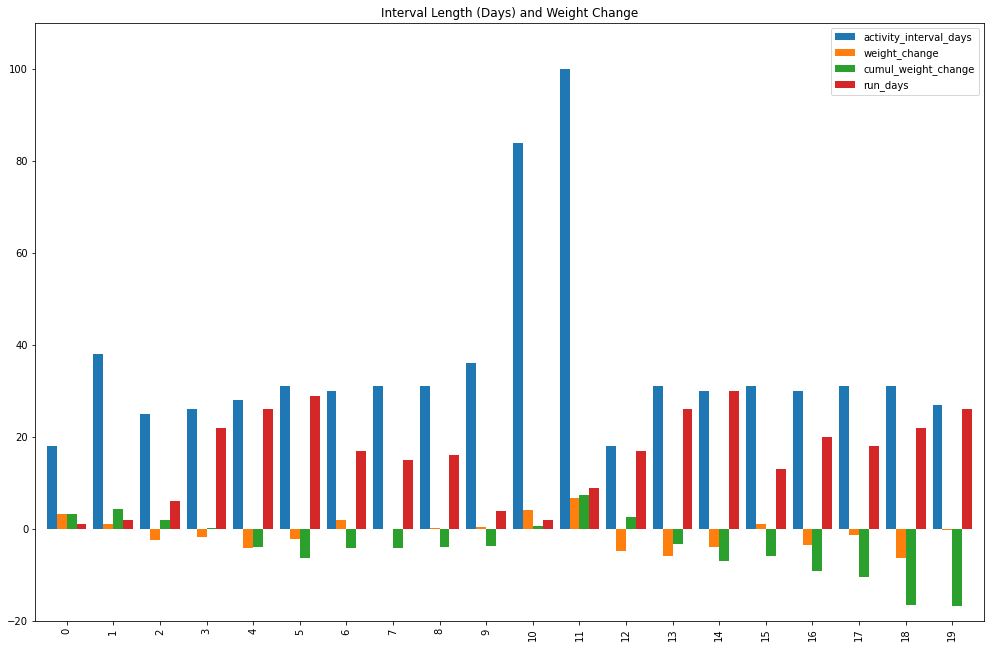

In [21]:
interval_weight_change_plot = interval_activity_frequency_weight.plot.bar(
    title="Interval Length (Days) and Weight Change",
    y=["activity_interval_days", "weight_change", "cumul_weight_change", "run_days"],
    figsize=(17, 11), width=0.85, ylim=(-20, 110))

There are several intervals in which I did not measure my weight on the first day of the month, so I define each interval as the period between two first weigh-ins of each month. The longest interval in my study is a 100 days.  

Long periods of not tracking weight usually ends with a weight gain. There were 84 days between periods 9 and 10, and 100 days between periods 10 and 11. For the periods where there were resulting weight loss, I had tracked my weight regularly and acted on the data to reduce weight.

### Closing Rings and Weight Changes

In [22]:
interval_activity_totals = pd.read_csv(f"{study_path}/month_firstdate_intervals_activity_totals.csv")

In [23]:
interval_activity_totals_weight_changes = pd.merge(interval_weights, 
                                                   interval_activity_totals, 
                                                   left_on="interval_key", 
                                                   right_on="interval_key")

In [30]:
interval_activity_totals_weight_changes

,index,interval_key,interval_start,interval_end,interval_days,start_weight,end_weight,weight_change,cumul_weight_change,active_energy_burned,...,exercise_ring_closed,stand_ring_closed,rings_closed,all_rings_closed,movement_distance,run_duration,run_distance,run_energy_burned,vo2max,resting_heart_rate
0,0,20181017T20181104,2018-10-17,2018-11-04,18,157.0,160.2,3.2,3.2,12330.578,...,14,17,43,12,138.511331,30.534501,2.499776,305.262638,88.925400,1021.0
1,1,20181104T20181212,2018-11-04,2018-12-12,38,160.2,161.3,1.1,4.3,26123.510,...,22,36,84,22,278.114969,46.994349,4.347236,516.981232,87.372800,2180.5
2,2,20181212T20190106,2018-12-12,2019-01-06,25,161.3,159.0,-2.3,2.0,19826.989,...,23,24,70,22,194.597592,123.204478,12.567684,1327.525282,544.407553,1292.0
3,3,20190106T20190201,2019-01-06,2019-02-01,26,159.0,157.2,-1.8,0.2,24572.786,...,26,26,78,26,295.145622,766.345781,72.654360,7432.462536,185.990058,1561.0
4,4,20190201T20190301,2019-02-01,2019-03-01,28,157.2,153.0,-4.2,-4.0,23948.786,...,28,28,84,28,294.377140,820.343961,79.144049,7873.379549,45.252567,1734.0
5,5,20190301T20190401,2019-03-01,2019-04-01,31,153.0,150.8,-2.2,-6.2,28080.294,...,31,31,93,31,356.281305,1068.523994,107.900201,10467.909433,232.113400,1801.0
6,6,20190401T20190501,2019-04-01,2019-05-01,30,150.8,152.8,2.0,-4.2,23144.294,...,28,29,85,27,271.195486,499.058742,48.236084,4825.754325,145.614375,1707.0
7,7,20190501T20190601,2019-05-01,2019-06-01,31,152.8,152.8,0.0,-4.2,21186.197,...,24,30,76,21,226.271208,411.343542,41.268989,4031.175811,142.708300,1861.0
8,8,20190601T20190702,2019-06-01,2019-07-02,31,152.8,153.0,0.2,-4.0,23713.600,...,29,30,87,27,252.809595,440.581564,42.825729,4253.404386,322.653697,1780.0
9,9,20190702T20190812,2019-07-02,2019-08-12,41,153.0,153.4,0.4,-3.6,17623.535,...,14,20,45,9,150.975331,118.727606,10.230263,995.254959,311.050150,2033.0


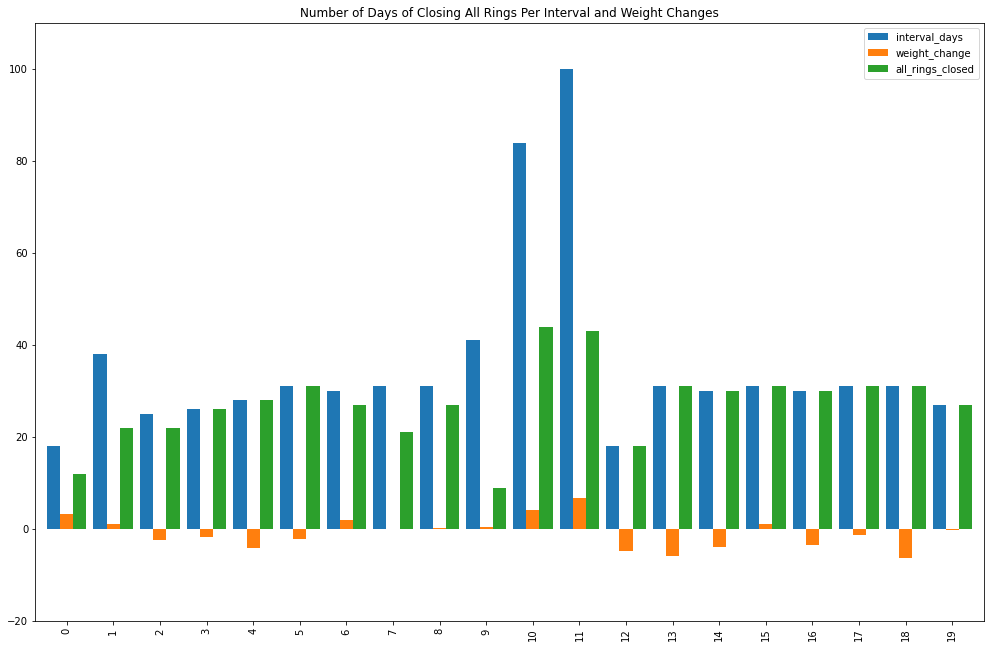

In [24]:
interval_allrings_closed_weight_changes_bar_plot = interval_activity_totals_weight_changes.plot.bar(
    title="Number of Days of Closing All Rings Per Interval and Weight Changes",
    y=["interval_days", "weight_change", "all_rings_closed"],
    figsize=(17, 11), width=0.85, ylim=(-20, 110))

For the intervals with weight losses, the number of days of closing all rings matches or is close to the number of days in the interval period. Period 11 spurred me to close all of my daily rings as often as possible, which turned out to be every day from periods 12 to 19.

#### Closing Rings and Periods of Weight Gains

In [25]:
interval_closed_rings_weight_gains = \
interval_activity_totals_weight_changes.loc[interval_activity_totals_weight_changes["weight_change"] > 1, 
                                            ["index", "interval_days", "weight_change", 
                                             "energy_ring_closed", "exercise_ring_closed", "stand_ring_closed", 
                                             "all_rings_closed"]]

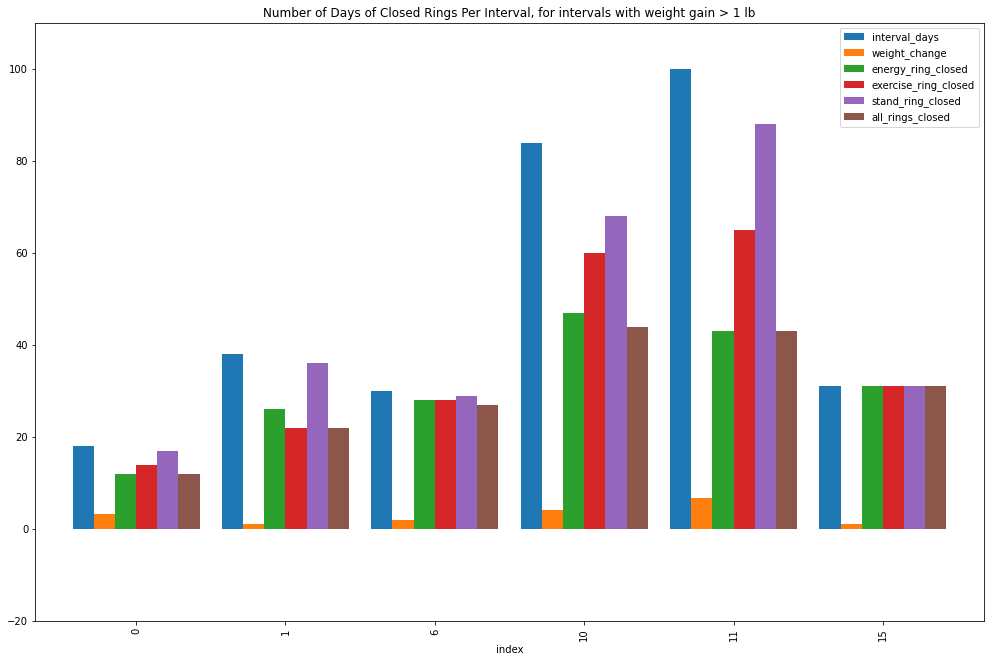

In [26]:
interval_closed_rings_weight_gain_bar_plot = interval_closed_rings_weight_gains.plot.bar(
    title="Number of Days of Closed Rings Per Interval, for intervals with weight gain > 1 lb",
    x="index",
    y=["interval_days", "weight_change", "energy_ring_closed", 
       "exercise_ring_closed", "stand_ring_closed", "all_rings_closed"],
    figsize=(17, 11), width=0.85, ylim=(-20, 110))

Standing and moving around after every hour of sitting is good practice. I like it. However, the stand ring has no bearing on weight reduction or weight maintenance, so it's not an important metric to me.

It is very easy to close the Exercise Ring without burning many calories, just walk at a slow pace for 30 minutes. I closed more exercise rings than move rings (energy_ring_closed in the graph) during the weight-gain intervals.

The daily Move Ring goal is a personalized feature. I don't remember Apple Watch's default calories goal for the Move Ring , but I turned up the minimum calories to burn per day.


### The Move Ring is the One Ring to Rule Them All? 

In [36]:
interval_activity_averages = pd.read_csv(f"{study_path}/month_firstdate_intervals_activity_averages.csv")

In [37]:
interval_activity_averages_weight_changes = pd.merge(interval_weights, 
                                                     interval_activity_averages, 
                                                     left_on="interval_key", 
                                                     right_on="interval_key")

In [38]:
interval_activity_averages_weight_changes.dtypes

index                                   int64
interval_key                           object
interval_start                         object
interval_end                           object
interval_days                           int64
start_weight                          float64
end_weight                            float64
weight_change                         float64
cumul_weight_change                   float64
avg_active_energy_burned              float64
avg_apple_exercise_minutes            float64
avg_energy_goal_delta                 float64
avg_apple_exercise_time_goal_delta    float64
avg_apple_stand_hours_goal_delta      float64
avg_energy_ring_closed                float64
avg_exercise_ring_closed              float64
avg_stand_ring_closed                 float64
avg_rings_closed                      float64
avg_all_rings_closed                  float64
avg_movement_miles                    float64
avg_run_minutes                       float64
avg_run_miles                     

In [43]:
interval_activity_averages_weight_changes[["index", 
                                         "interval_key",
                                         "interval_days",
                                         "weight_change",
                                         "avg_active_energy_burned",
                                         "avg_run_energy_burned",
                                         "avg_energy_goal_delta"]]

,index,interval_key,interval_days,weight_change,avg_active_energy_burned,avg_run_energy_burned,avg_energy_goal_delta
0,0,20181017T20181104,18,3.2,685.032111,305.262638,85.032111
1,1,20181104T20181212,38,1.1,687.460789,258.490616,87.460789
2,2,20181212T20190106,25,-2.3,793.079560,221.254214,193.079560
3,3,20190106T20190201,26,-1.8,945.107154,337.839206,345.107154
4,4,20190201T20190301,28,-4.2,855.313786,302.822290,255.313786
5,5,20190301T20190401,31,-2.2,905.815935,360.962394,292.267548
6,6,20190401T20190501,30,2.0,771.476467,283.867901,151.476467
7,7,20190501T20190601,31,0.0,683.425710,268.745054,63.425710
8,8,20190601T20190702,31,0.2,764.954839,265.837774,144.954839
9,9,20190702T20190812,41,0.4,489.542639,248.813740,-130.457361


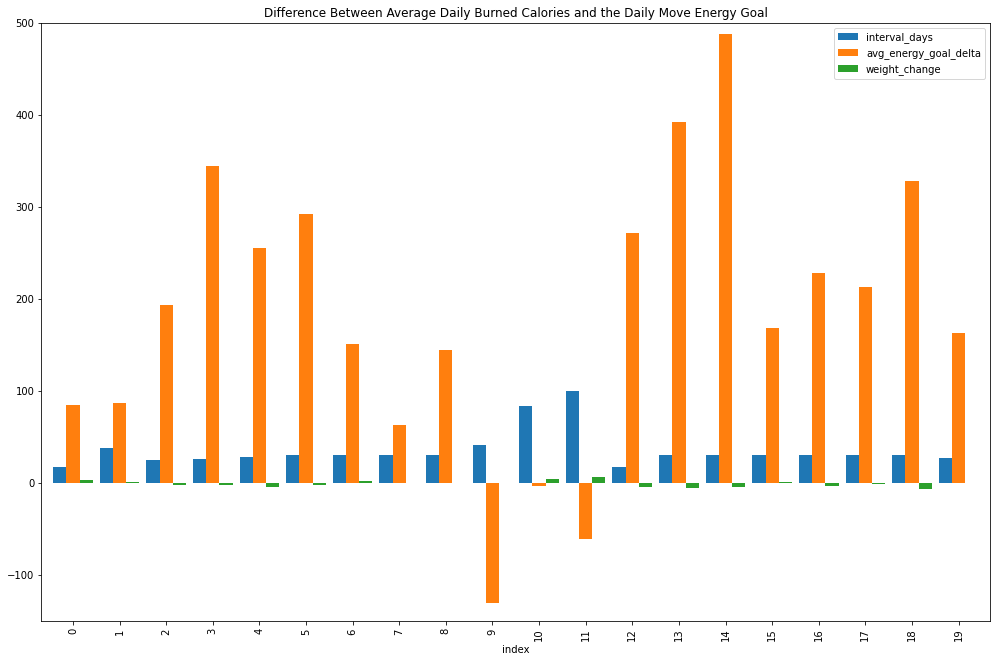

In [29]:
interval_activity_averages_weight_changes_bar_plot = interval_activity_averages_weight_changes.plot.bar(
    title="Difference Between Average Daily Burned Calories and the Daily Move Energy Goal",
    x="index",
    y=["interval_days", "avg_energy_goal_delta", "weight_change"],
    figsize=(17, 11), width=0.85, ylim=(-150, 500)
)

1. Interval 9 should be ignored because my Apple Watch was not on my wrist for a few days. It was sent to Apple for servicing. 

2. Intervals 10 and 11 have the most noticeable weight gain; both intervals show that on average, I did not meet my daily Move calories goal.

3. Burning the most calories per interval does not translate to the highest weight loss (see interval 14). Intervals 13, 14 and 18 have nearly-identical interval lengths but interval 18 with the least calories among the three has the highest weight loss. The reason is diet. I started a five-week food-experiment during interval 18 and added eggplants and bittermelons to my daily meals, and the change contributed to the weight loss. 

For now, I am going to consider the Move Ring as the ring that rules the weight-loss domain.  However it is best to combine meeting the daily Move Calories goal with eating smaller portions of healthy food during mealtimes.
